# Labor Sector Indicators

**1. Unit Labour Costs (ULCs)**

Definition:

    Unit Labour Costs (ULCs) measure the average cost of labor to produce one unit of output. Essentially, ULCs represent how much labor costs contribute to the production process.

Formula:

$$ \text{ULC} = \frac{\text{Total Labor Costs}}{\text{Total Output}} $$
 
Explanation:

    ULCs help assess the cost efficiency of labor. If ULCs are rising, it could mean wages are growing faster than productivity, which may lead to inflationary pressures.
    A decrease in ULCs typically indicates that labor productivity is improving or labor costs are falling.

**2. Average Labor Compensation per Hour Worked (ALCH)**

Definition:

    Average Labor Compensation per Hour Worked (ALCH) represents the total remuneration (wages, salaries, and other benefits) received by workers for each hour of work.

Formula:

$$ \text{ALCH} = \frac{\text{Total Compensation}}{\text{Total Hours Worked}} $$

Explanation:

    ALCH measures how much, on average, workers are compensated for an hour of labor.
    It includes wages, bonuses, social contributions, and other benefits, offering a broader view than just wages.
    Higher ALCH typically reflects better-paid workers or industries with higher compensation.
    It is useful for comparing the labor market dynamics of different sectors or regions.
    
**3. Labour Share of Income (LSI)**

Definition:

    Labour Share of Income (LSI) refers to the portion of national income (or GDP) that is paid to workers in the form of wages, salaries, and benefits, as opposed to income accruing to capital (profits, dividends, etc.).

Formula:

$$ \text{LSI} = \frac{\text{Total Labor Compensation}}{\text{Gross Domestic Product (GDP)}} $$

 
Explanation:

    LSI shows the proportion of economic output that goes to workers versus capital owners.
    A higher LSI means that a larger share of income is going to labor, which could indicate a stronger bargaining position for workers.
    If LSI decreases, it suggests that more income is flowing to capital (e.g., profits, returns on investment) rather than to workers.
    It’s a key indicator in discussions about income inequality and economic distribution.


## Load the Data

* Nominal unit labour costs table indexes unit labour costs (ULCs) for industries to the 2019 values. (Index 2019 = 100)

* Average labour compensation per hour worked table indexes average labour compensation per hour worked (ALCH) for industries to the 2019 values. (Index 2019 = 100)

* Labour share of income This table indexes labour share for industries to the 2019 values. (Index 2019 = 100)

In [21]:
    import pandas as pd
    
    # Load the Excel file
    file_path = 'data/Labour sector.xlsx'
    xls = pd.ExcelFile(file_path)
    
    # List all sheet names to explore
    xls.sheet_names
    

['Labour share of income',
 'Average compensation per hour w',
 'Unit labour costs']

In [22]:
# Load individual sheets into DataFrames
df_ulc = pd.read_excel(xls, 'Unit labour costs', skiprows=5)
df_alch = pd.read_excel(xls, 'Average compensation per hour w', skiprows=5)
df_lsi = pd.read_excel(xls, 'Labour share of income', skiprows=5)

In [23]:
labour_sector_collumns = ['Quarter', 'Whole economy', 'Production', 'Services',
                          'Agriculture, forestry and fishing', 'Mining and quarrying', 'Manufacturing',
                          'Electricity, gas, steam and air', 'Water supply', 'Construction',
                          'Wholesale and retail trade',
                          'Transportation', 'Accommodation and food', 'Information and communication',
                          'Financial and insurance', 'Real estate', 'Professional, scientific and technical',
                          'Administrative', 'Public administration', 'Education', 'Human health and social work',
                          'Arts and entertainment', 'Other service activities', 'Household activities']

# Renaming columns for Unit Labour Costs
df_ulc.columns = labour_sector_collumns

# Renaming columns for Average Labor Compensation (ALCH)
df_alch.columns = labour_sector_collumns

# Renaming columns for Labour Share of Income (LSI)
df_lsi.columns = labour_sector_collumns

In [25]:
# Define function to parse Quarter to Date
def quarter_to_date(quarter_str):
    year, quarter = quarter_str.split()
    month = {'Q1': '01', 'Q2': '04', 'Q3': '07', 'Q4': '10'}[quarter]
    return f"{year}-{month}-01"

# Apply transformation for each DataFrame
for df, csv_name in zip([df_ulc, df_alch, df_lsi], 
                        ['./data/unit_labour_costs.csv', 
                         './data/average_compensation_per_hour.csv', 
                         './data/labour_share_of_income.csv']):
    # Filter the required columns
    df_filtered = df.loc[:, ['Quarter', 'Whole economy']].copy()
    
    # Convert Quarter to Date
    df_filtered.loc[:, 'Date'] = df_filtered['Quarter'].apply(quarter_to_date)
    df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])
    
    # Drop the Quarter column
    df_filtered.drop(columns=['Quarter'], inplace=True)

    # Save each filtered DataFrame to CSV
    df_filtered.to_csv(csv_name, index=False)

## Descriptive Statistics

Because the data is indexed to 2019 (Index 2019 = 100), all values represent a percentage of the 2019 baseline. Therefore, any fluctuations in these indexes reflect relative changes compared to that base year.

In [4]:
# Descriptive statistics for ULCs
ulc_stats = df_ulc.describe()
ulc_stats

,Whole economy,Production,Services,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air",Water supply,Construction,Wholesale and retail trade,...,Financial and insurance,Real estate,"Professional, scientific and technical",Administrative,Public administration,Education,Human health and social work,Arts and entertainment,Other service activities,Household activities
count,109.00000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,...,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.00000,109.000000,109.000000,109.000000
mean,87.01519,91.051108,87.265059,81.413930,81.619548,98.020712,89.504539,75.901910,76.735993,85.064023,...,82.471024,73.182457,83.043570,86.180190,87.325976,86.672939,81.23352,73.844197,78.495310,79.238723
std,14.99732,13.042829,15.309865,28.943999,51.620097,8.135063,37.998561,25.165671,19.488172,16.249137,...,19.655399,22.492904,16.346561,15.403516,18.132934,25.570541,28.18844,21.539385,22.244956,22.033779
min,61.50040,72.686700,58.986700,39.209500,16.625200,82.748900,32.956500,30.290100,39.062500,52.822300,...,41.706500,37.386500,55.038300,57.553400,55.685200,41.834200,42.95000,34.092800,36.531400,41.813400
25%,73.84030,81.257300,75.773600,56.942900,25.688700,93.158200,54.282000,50.484100,60.290700,74.990200,...,66.723000,50.081700,70.793600,75.492200,75.495700,64.974500,61.70750,56.421900,58.378400,61.265500
50%,88.74040,88.902000,88.640200,73.806500,78.198000,97.026400,96.453100,76.144100,79.854200,85.805600,...,82.737900,77.688100,81.089200,86.829000,89.906900,96.407600,79.76760,72.467300,85.730700,80.738000
75%,95.15130,98.488500,94.482600,99.986400,121.810300,102.666400,110.283800,91.050600,92.542800,92.875600,...,97.131500,85.858500,94.378700,90.721800,96.233200,100.713100,88.38940,94.256500,95.161400,93.576300
max,122.99860,131.021200,122.342200,151.829400,178.321500,121.045900,182.658000,139.540300,111.465800,123.578800,...,128.227600,117.777600,126.011800,124.633100,126.199000,180.568600,194.88830,129.483100,126.612100,147.779400


The Unit Labour Costs (ULCs) for the whole economy show a relatively moderate variation over time, with the majority of observations clustered between 73.84 and 95.15. This suggests that labor costs are generally stable, though there have been occasional high-cost periods (max = 122.99) which may warrant further investigation. The median being close to the mean also indicates that the data is symmetrically distributed, showing no significant skewness in labor cost trends over the studied quarters.

In [5]:
# Descriptive statistics for ALCH
alch_stats = df_alch.describe()
alch_stats

,Whole economy,Production,Services,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air",Water supply,Construction,Wholesale and retail trade,...,Financial and insurance,Real estate,"Professional, scientific and technical",Administrative,Public administration,Education,Human health and social work,Arts and entertainment,Other service activities,Household activities
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,...,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,82.614132,82.613583,82.633564,73.492012,90.209612,81.719238,93.597094,90.093011,80.546626,80.941742,...,79.072397,76.159766,86.844437,79.000983,75.879177,88.764175,80.759191,82.389177,79.601580,60.229521
std,19.429656,20.879675,19.344804,29.084042,20.567648,21.526186,16.650749,13.535662,18.688712,21.374462,...,25.318513,16.052334,18.681996,18.722624,20.719922,16.232653,20.367790,18.144055,21.996835,19.567335
min,47.274000,46.220100,47.552600,29.862700,48.556300,45.585700,57.092800,46.490700,42.247200,44.443300,...,33.608000,50.954600,49.766000,53.241700,43.370900,56.253900,44.084100,44.768700,46.029400,32.779800
25%,67.523200,64.692900,68.046000,49.082400,70.379700,63.799500,81.651800,82.813800,67.400000,63.177700,...,55.410900,62.772300,75.130300,64.771700,58.298600,76.021800,69.616000,72.447100,56.891300,43.878200
50%,84.768000,85.563500,85.034600,70.020500,98.632400,83.154500,98.079100,90.327400,80.539900,82.248700,...,85.516500,76.694700,88.607400,74.588400,76.340500,92.887200,80.213300,85.407100,82.840300,54.828200
75%,93.625400,95.080000,93.691300,89.154300,105.202600,94.732000,106.063400,97.931800,91.310700,93.397400,...,96.791800,85.570800,97.227400,88.411300,94.212300,97.480400,92.094200,93.470200,94.130300,73.457700
max,125.187200,134.466700,125.245400,155.171800,131.806200,137.141400,129.419800,125.555700,125.193800,132.964300,...,130.262100,108.037200,131.943400,130.642000,116.648500,128.044600,124.339800,129.704700,138.817200,139.912500


Overall Trends: The average ALCH being below 100 suggests that, overall, labor compensation has not returned to pre-2019 levels, possibly indicating ongoing economic challenges or sectoral shifts affecting wage growth.

Variability: The significant standard deviation and the range between the minimum (47.27) and maximum (125.19) values indicate that there is a considerable disparity in labor compensation across different industries or regions.

Wage Disparities: The lower quartile (67.52) shows that a substantial portion of the dataset represents industries with lower labor costs, which may raise concerns about income inequality and labor market dynamics.

In [6]:
# Descriptive statistics for Labour Share of Income (LSI)
lsi_stats = df_lsi.describe()
lsi_stats

,Whole economy,Production,Services,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air",Water supply,Construction,Wholesale and retail trade,...,Financial and insurance,Real estate,"Professional, scientific and technical",Administrative,Public administration,Education,Human health and social work,Arts and entertainment,Other service activities,Household activities
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,...,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.0
mean,99.807806,104.030235,99.210209,83.618826,107.429398,104.214983,111.230549,95.468764,102.757290,97.824173,...,101.702797,79.709151,101.870283,100.604085,103.867050,105.422941,98.950161,100.792529,100.690876,100.0
std,2.229427,3.973986,2.904355,16.237545,36.859315,4.060012,16.138312,8.380837,6.305983,5.246623,...,7.771365,17.870769,4.148428,2.876736,3.702678,4.129332,1.555826,5.988939,2.877246,0.0
min,92.451300,98.437600,89.961100,52.879100,65.639400,97.110700,79.344400,75.384500,84.486700,83.379100,...,83.919900,46.822400,94.192000,94.870600,97.656200,98.882500,96.044200,88.700600,94.058100,100.0
25%,99.088200,100.936000,98.641800,70.458800,80.297400,99.876200,103.001900,90.035300,98.190200,93.925600,...,96.870800,61.766700,98.731100,98.335900,100.150000,100.970000,97.621300,96.904500,98.692600,100.0
50%,100.085500,102.906100,99.777900,80.841400,97.053000,104.044600,108.676500,93.463000,102.637300,99.033200,...,101.402300,87.432300,100.426900,100.909800,105.089400,106.237800,99.019100,100.312100,100.173300,100.0
75%,101.150100,107.395100,100.977900,97.574700,123.322100,107.440300,116.171300,99.674800,107.534300,102.026700,...,106.305100,92.110300,104.384500,102.331100,106.989000,109.483300,100.377900,103.613700,102.325800,100.0
max,103.952300,114.913400,103.949000,114.310600,221.997600,112.065300,172.222400,122.766200,117.999400,104.901500,...,123.890800,107.801200,112.113900,107.726500,110.134300,111.446300,101.701800,116.280500,108.781000,100.0


Stability in LSI: The average LSI of about 99.81 indicates that labor's share of income has remained stable since 2019, suggesting consistent labor income relative to total income over the observed period.

Low Variability: With a standard deviation of 2.23, there is little fluctuation in LSI values, implying uniformity in how income is distributed among labor across various industries.

Historical Context: Given the long-term data, any deviations from the average LSI can provide insights into significant economic events or policy shifts affecting income distribution over time.

## Visualizations

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


### Evolution in Time (Key Events Perspective)

In [8]:
# Function to format x-axis ticks for better readability
def format_x_ticks(ax, df, interval=4):
    ax.set_xticks(df.index[::interval])  # Show every 'interval' label
    ax.set_xticklabels(df['Quarter'][::interval], rotation=45)

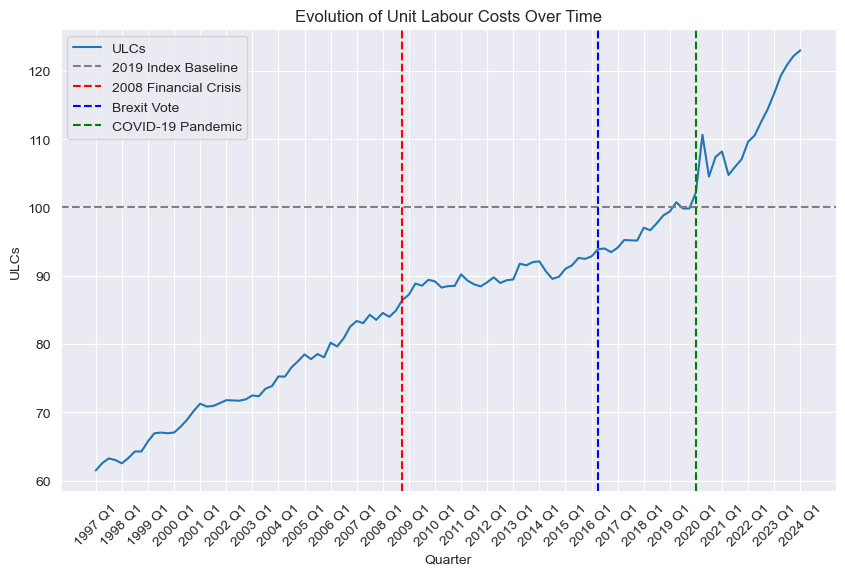

In [9]:
# Time series plot for ULC
plt.figure(figsize=(10, 6))
plt.plot(df_ulc['Quarter'], df_ulc['Whole economy'], label='ULCs')
plt.axhline(y=100, color='gray', linestyle='--', label='2019 Index Baseline')
# Adding key economic events as vertical lines
plt.axvline(x='2008 Q4', color='red', linestyle='--', label='2008 Financial Crisis')
plt.axvline(x='2016 Q2', color='blue', linestyle='--', label='Brexit Vote')
plt.axvline(x='2020 Q1', color='green', linestyle='--', label='COVID-19 Pandemic')
plt.title('Evolution of Unit Labour Costs Over Time')
plt.xlabel('Quarter')
plt.ylabel('ULCs')
ax = plt.gca()
format_x_ticks(ax, df_ulc, interval=4)  # Show every 4th quarter
plt.grid(True)
plt.legend()
plt.show()


* Spikes and declines correspond to economic shocks, where output decreases or wages increase disproportionately.

* The 2008 financial crisis shows a visible impact on labor costs, as businesses adjusted to economic uncertainties. Between 2008 and 2013, the UK labor market experienced several downturns characterized by stagnation in labor costs. Many industries struggled to restore their pre-crisis labor cost levels, contributing to the overall stagnation.

* The spike at the end of 2019 might be indicative of heightened economic activity or increased wages

* The significant drop at the beginning of 2020 likely correlates with the onset of the COVID-19 pandemic, which led to widespread lockdowns, decreased economic activity, and significant disruptions in various sectors.

* Following the initial drop, the smaller spike might reflect a gradual recovery as businesses began to reopen and adjust to the new normal, while the subsequent low could be tied to continued uncertainty in the economy, such as changing restrictions or fluctuations in consumer demand.

* The fact that unit labour costs reached the same level as the 2019 spike in 2022, despite fluctuations, suggests a potential stabilization in the economy. This recovery phase might indicate that businesses have adapted to new conditions, possibly by investing in technology or restructuring their operations to improve efficiency.

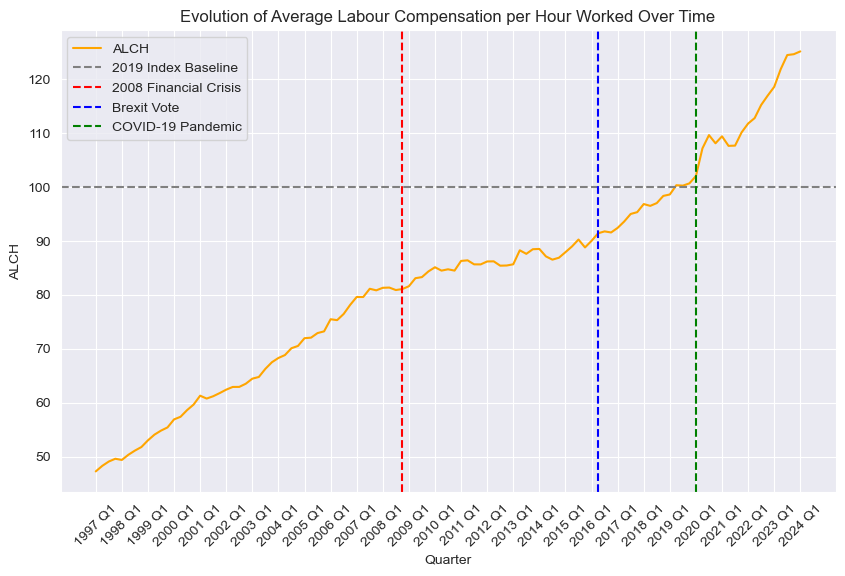

In [10]:
# Time series plot for ALCH
plt.figure(figsize=(10, 6))
plt.plot(df_alch['Quarter'], df_alch['Whole economy'], label='ALCH', color='orange')
plt.axhline(y=100, color='gray', linestyle='--', label='2019 Index Baseline')
# Adding key economic events as vertical lines
plt.axvline(x='2008 Q4', color='red', linestyle='--', label='2008 Financial Crisis')
plt.axvline(x='2016 Q2', color='blue', linestyle='--', label='Brexit Vote')
plt.axvline(x='2020 Q1', color='green', linestyle='--', label='COVID-19 Pandemic')
plt.title('Evolution of Average Labour Compensation per Hour Worked Over Time')
plt.xlabel('Quarter')
plt.ylabel('ALCH')
ax = plt.gca()
format_x_ticks(ax, df_ulc, interval=4)  # Show every 4th quarter
plt.grid(True)
plt.legend()
plt.show()

* The significant reduction in the ALCH growth rate starting wiyh the 2008 crisis till around 2016 indicates that the economic recovery was sluggish, with many workers experiencing stagnant wages and diminished purchasing power.
 
* The period following the crisis was characterized by more volatile fluctuations in ALCH. This heightened volatility suggests that businesses were responding reactively to shifting economic conditions rather than following a stable growth trajectory.

* The significant fluctuations in 2020 / 2021 correspond with the onset of the COVID-19 pandemic, which led to widespread lockdowns and disruptions in economic activity.



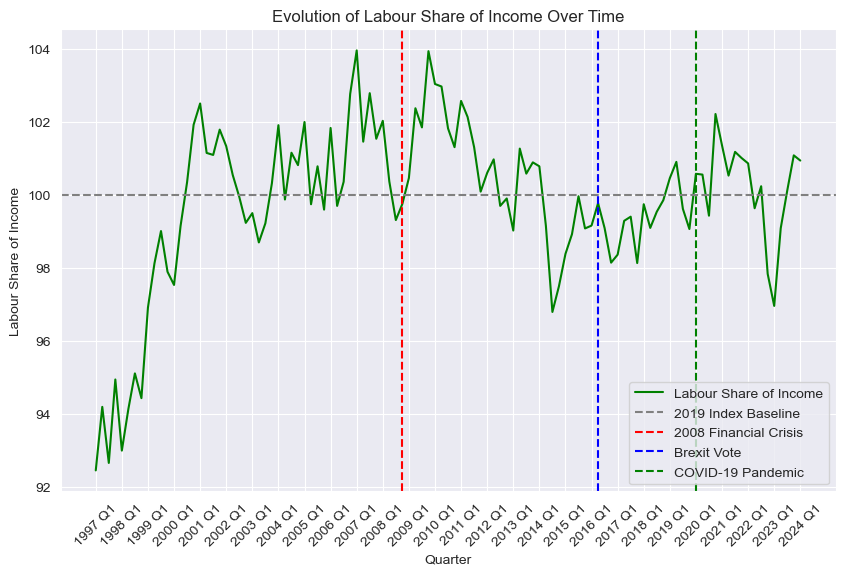

In [11]:
# Time series plot for Labour Share of Income
plt.figure(figsize=(10, 6))
plt.plot(df_lsi['Quarter'], df_lsi['Whole economy'], label='Labour Share of Income', color='green')
plt.axhline(y=100, color='gray', linestyle='--', label='2019 Index Baseline')
# Adding key economic events as vertical lines
plt.axvline(x='2008 Q4', color='red', linestyle='--', label='2008 Financial Crisis')
plt.axvline(x='2016 Q2', color='blue', linestyle='--', label='Brexit Vote')
plt.axvline(x='2020 Q1', color='green', linestyle='--', label='COVID-19 Pandemic')
plt.title('Evolution of Labour Share of Income Over Time')
plt.xlabel('Quarter')
plt.ylabel('Labour Share of Income')
ax = plt.gca()
format_x_ticks(ax, df_ulc, interval=4)  # Show every 4th quarter
plt.grid(True)
plt.legend()
plt.show()

* The 2008 financial crisis led to a noticeable decline in the Labour Share of Income. This downturn illustrates how economic distress can shift the distribution of income away from labor, as companies faced financial pressures and often prioritized capital retention over wage growth.

* The significant drop at the beginning of 2020 correlates with the onset of the COVID-19 pandemic, which dramatically disrupted economic activity. 

* The long-term trend in LSI suggests that the labor share has not fully recovered to pre-2008 crisis levels, raising concerns about the sustainability of labor income relative to capital. 

### Relationship Analysis

In [12]:
# Merge data with better column labels for clarity
df_combined = pd.concat([df_ulc['Whole economy'], df_alch['Whole economy'], df_lsi['Whole economy']], axis=1)
df_combined.columns = ['ULCs', 'ALCH', 'LSI']  # Renaming for clarity

# Calculate correlation matrix
correlation_matrix = df_combined.corr()
correlation_matrix

,ULCs,ALCH,LSI
ULCs,1.000000,0.996765,0.322720
ALCH,0.996765,1.000000,0.346378
LSI,0.322720,0.346378,1.000000


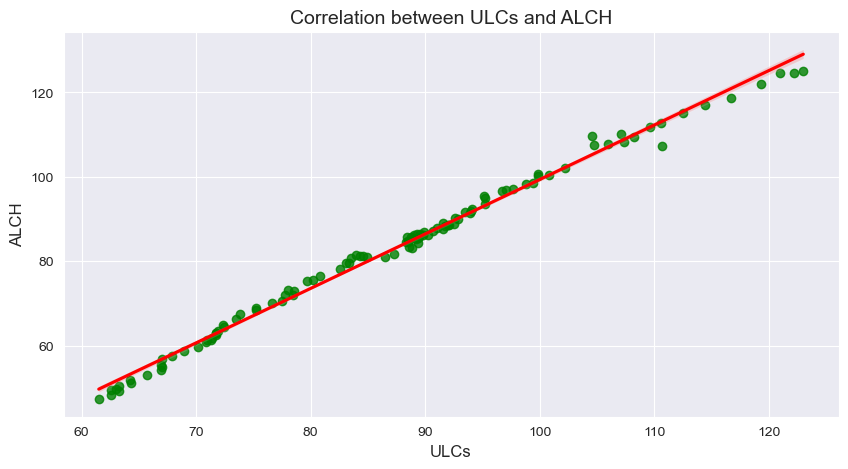

In [13]:
plt.figure(figsize=(10, 5))
sns.regplot(x=df_combined['ULCs'],
            y=df_combined['ALCH'], color='g', line_kws=dict(color='r'))
plt.title('Correlation between ULCs and ALCH', fontsize=14)
plt.xlabel('ULCs', fontsize=12)
plt.ylabel('ALCH', fontsize=12)
plt.grid(True)
plt.show()

**Strong Positive Correlation Between ULCs and ALCH:**

The correlation coefficient of 0.996765 indicates a very strong positive correlation between Unit Labour Costs and Average Labour Compensation. This suggests that as average labor compensation increases, unit labor costs tend to increase as well, which is consistent with economic theory: higher wages often lead to higher labor costs.

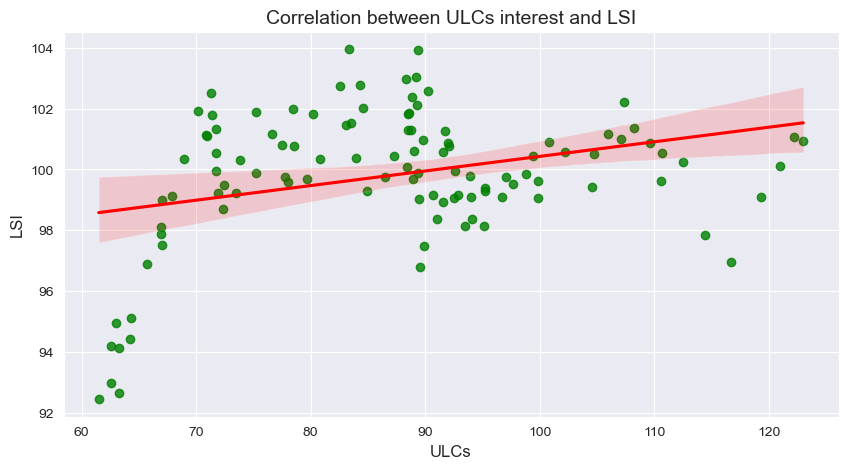

In [14]:
plt.figure(figsize=(10, 5))
sns.regplot(x=df_combined['ULCs'],
            y=df_combined['LSI'], color='g', line_kws=dict(color='r'))
plt.title('Correlation between ULCs interest and LSI', fontsize=14)
plt.xlabel('ULCs', fontsize=12)
plt.ylabel('LSI', fontsize=12)
plt.grid(True)
plt.show()

**Low Positive Correlation Between ULCs/ALCH and LSI:**
The correlation coefficients of 0.322720 (ULCs and LSI) and 0.346378 (ALCH and LSI) indicate a low positive correlation between unit labor costs (and average labor compensation) and the labor share of income. This suggests that  while changes in labor costs and compensation can influence labor’s share of income, other factors (like capital income or overall economic conditions) likely also play significant roles in determining LSI.

### Combined Plot with All Three Indexes

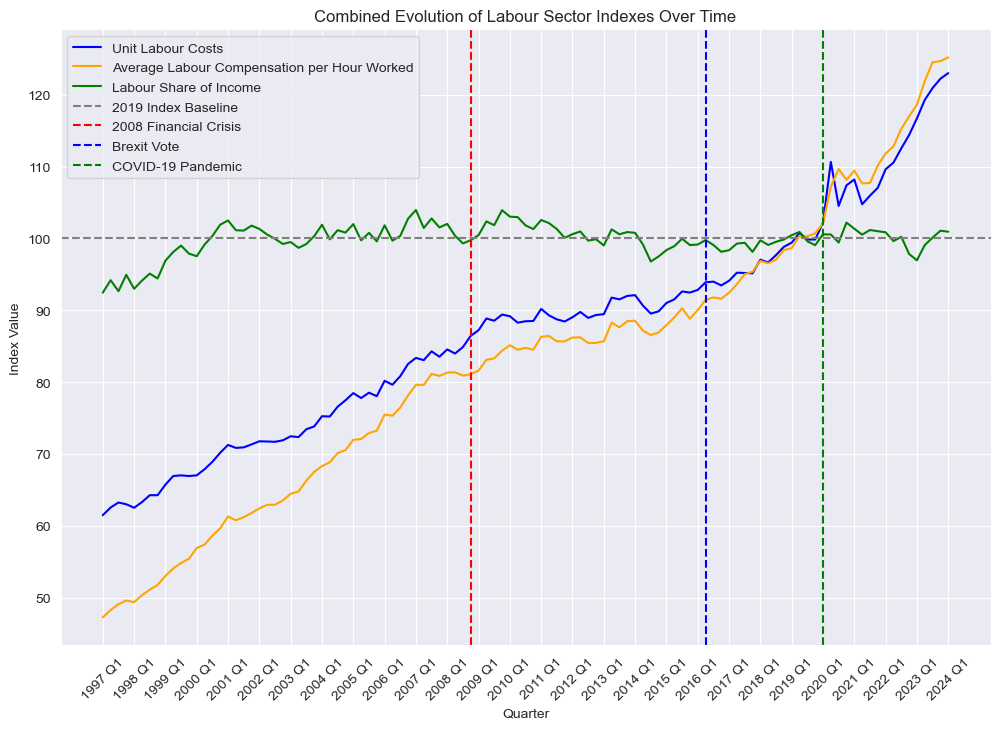

In [15]:
plt.figure(figsize=(12, 8))

# Plot for Unit Labour Costs
plt.plot(df_ulc['Quarter'], df_ulc['Whole economy'], label='Unit Labour Costs', color='blue')

# Plot for Average Labour Compensation
plt.plot(df_alch['Quarter'], df_alch['Whole economy'], label='Average Labour Compensation per Hour Worked',
         color='orange')

# Plot for Labour Share of Income
plt.plot(df_lsi['Quarter'], df_lsi['Whole economy'], label='Labour Share of Income', color='green')

plt.axhline(y=100, color='gray', linestyle='--', label='2019 Index Baseline')
# Adding key economic events as vertical lines
plt.axvline(x='2008 Q4', color='red', linestyle='--', label='2008 Financial Crisis')
plt.axvline(x='2016 Q2', color='blue', linestyle='--', label='Brexit Vote')
plt.axvline(x='2020 Q1', color='green', linestyle='--', label='COVID-19 Pandemic')

plt.title('Combined Evolution of Labour Sector Indexes Over Time')
plt.xlabel('Quarter')
plt.ylabel('Index Value')
ax = plt.gca()
format_x_ticks(ax, df_ulc, interval=4)  # Show every 4th quarter
plt.legend()
plt.grid(True)
plt.show()

The combined plot showcasing Unit Labour Costs (ULCs), Average Labour Compensation per Hour Worked (ALCH), and Labour Share of Income (LSI) offers a comprehensive view of labor market dynamics in the UK, illustrating the interplay between labor costs and compensation relative to income distribution over time.

Interconnected Trends:

The close relationship between ULCs and ALCH is evident, as both measures generally move in tandem. This correlation suggests that changes in labor costs are often reflected in the compensation paid to workers, indicating that businesses tend to adjust wages in response to shifts in overall labor costs.

Stagnation and Recovery:

The plot reveals periods of stagnation, particularly following the 2008 financial crisis and the COVID-19 pandemic. During these times, both ULCs and ALCH show slower growth or declines, reflecting challenges in the labor market and suggesting that workers faced difficulties in achieving wage growth during economic downturns.

### Rolling statistics
Using rolling averages smooths out the short-term fluctuations and provides clearer insights into long-term trends.

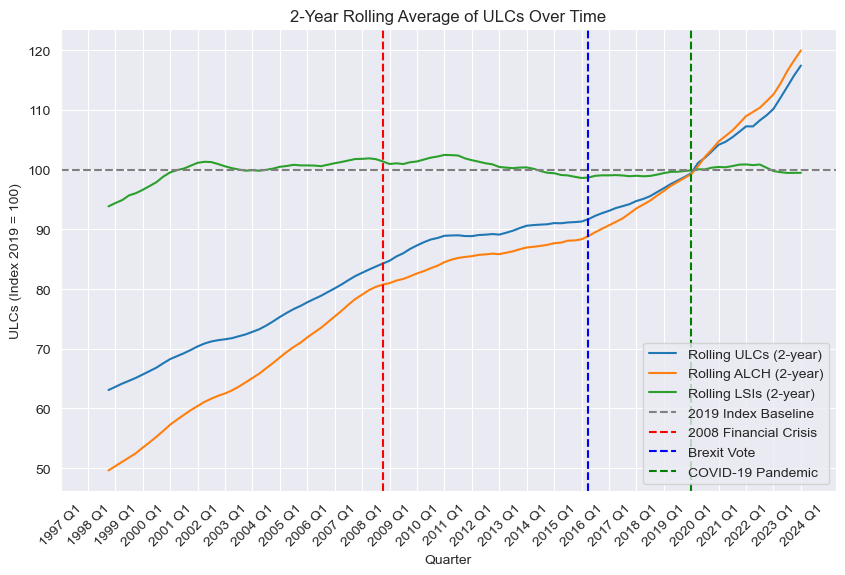

In [16]:
df_ulc['ULCs_rolling'] = df_ulc['Whole economy'].rolling(window=8).mean()
df_alch['ALCHs_rolling'] = df_alch['Whole economy'].rolling(window=8).mean()
df_lsi['LSIs_rolling'] = df_lsi['Whole economy'].rolling(window=8).mean()

plt.figure(figsize=(10, 6))
plt.plot(df_ulc['Quarter'], df_ulc['ULCs_rolling'], label='Rolling ULCs (2-year)')
plt.plot(df_alch['Quarter'], df_alch['ALCHs_rolling'], label='Rolling ALCH (2-year)')
plt.plot(df_lsi['Quarter'], df_lsi['LSIs_rolling'], label='Rolling LSIs (2-year)')

plt.axhline(y=100, color='gray', linestyle='--', label='2019 Index Baseline')
plt.axvline(x='2008 Q4', color='red', linestyle='--', label='2008 Financial Crisis')
plt.axvline(x='2016 Q2', color='blue', linestyle='--', label='Brexit Vote')
plt.axvline(x='2020 Q1', color='green', linestyle='--', label='COVID-19 Pandemic')

plt.title('2-Year Rolling Average of ULCs Over Time')
plt.xlabel('Quarter')
plt.ylabel('ULCs (Index 2019 = 100)')
ax = plt.gca()
format_x_ticks(ax, df_ulc, interval=4)
plt.legend()
plt.show()

The analysis of the 2-year rolling averages for Unit Labour Costs (ULCs), Average Labour Compensation per Hour Worked (ALCH), and Labour Share of Income (LSI) provides a clearer understanding of the underlying trends in labor costs and compensation dynamics over time, smoothing out short-term fluctuations to reveal more persistent patterns.

The main trends that can be seen are the stagnation after the 2008 crisis and wich had a greater inpact than the COVID-19 pandemic, according to the data at the moment.

## Conclusion

The indexed data from 1997 to 2024 provides a comprehensive look at labor sector dynamics across multiple economic phases:

ULCs and ALCH give insights into labor cost inflation and wage changes across industries, reflecting how different sectors were impacted by key historical events.

Labour Share of Income helps us understand labor's relative earnings compared to capital income. Cyclical changes are expected here, with labor generally faring better during downturns.

Indexing to 2019 provides a clear baseline for analyzing how far labor costs and wages have deviated from recent norms, highlighting trends of relative recovery or decline in the post-Brexit, post-pandemic landscape.